The following metrics for fused images have been used and extended for our use-case.


***

```matlab
function [QABF,LABF,NABF,NABF1]=objective_fusion_perform_fn(xrcw,x)
%%% objective_fusion_perform_fn: Computes the Objective Fusion Performance Parameters proposed by Petrovic
%%% and modified Fusion Artifacts (NABF) measure proposed by B. K. Shreyamsha Kumar
%%% 
%%% Inputs: 
%%% xrcw -> fused image
%%% x -> source images, x{1}, x{2}
%%%
%%% Outputs:
%%% QABF -> Total information transferred from source images to fused image measure proposed by Petrovic
%%% LABF -> Total loss of information measure proposed by Petrovic
%%% NABF1 -> Fusion Artifacts measure proposed by Petrovic
%%% NABF -> Modified Fusion Artifacts measure proposed by B. K. Shreyamsha Kumar
%%%
%%% Author : B. K. SHREYAMSHA KUMAR 
%%% Created on 28-10-2011.
%%% Updated on 08-11-2011.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Petrovic Metrics %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Parameters for Petrovic Metrics Computation.
Td=2;       
wt_min=0.001;
P=1;        
Lg=1.5;     
Nrg=0.9999; 
kg=19;      
sigmag=0.5; 
Nra=0.9995; 
ka=22;      
sigmaa=0.5; 
%%% Edge Strength & Orientation.
[gvA,ghA]=sobel_fn(x{1});
gA=sqrt(ghA.^2+gvA.^2);
[gvB,ghB]=sobel_fn(x{2});
gB=sqrt(ghB.^2+gvB.^2);
[gvF,ghF]=sobel_fn(xrcw);
gF=sqrt(ghF.^2+gvF.^2);
%%% Relative Edge Strength & Orientation.
[p,q]=size(xrcw);
for ii=1:p
   for jj=1:q
      if(gA(ii,jj)==0 | gF(ii,jj)==0)
         gAF(ii,jj)=0;
      elseif(gA(ii,jj)>gF(ii,jj))
         gAF(ii,jj)=gF(ii,jj)/gA(ii,jj);
      else
         gAF(ii,jj)=gA(ii,jj)/gF(ii,jj);
      end
      if(gB(ii,jj)==0 | gF(ii,jj)==0)
         gBF(ii,jj)=0;      
      elseif(gB(ii,jj)>gF(ii,jj))
         gBF(ii,jj)=gF(ii,jj)/gB(ii,jj);
      else
         gBF(ii,jj)=gB(ii,jj)/gF(ii,jj);
      end
      if(gvA(ii,jj)==0 & ghA(ii,jj)==0)
         aA(ii,jj)=0;
      else
         aA(ii,jj)=atan(gvA(ii,jj)/ghA(ii,jj));
      end      
      if(gvB(ii,jj)==0 & ghB(ii,jj)==0)
         aB(ii,jj)=0;
      else
         aB(ii,jj)=atan(gvB(ii,jj)/ghB(ii,jj));
      end
      if(gvF(ii,jj)==0 & ghF(ii,jj)==0)
         aF(ii,jj)=0;
      else
         aF(ii,jj)=atan(gvF(ii,jj)/ghF(ii,jj));
      end      
   end
end
aAF=abs(abs(aA-aF)-pi/2)*2/pi;
aBF=abs(abs(aB-aF)-pi/2)*2/pi;
%%% Edge Preservation Coefficient.
QgAF=Nrg./(1+exp(-kg*(gAF-sigmag)));
QaAF=Nra./(1+exp(-ka*(aAF-sigmaa)));
QAF=sqrt(QgAF.*QaAF);
QgBF=Nrg./(1+exp(-kg*(gBF-sigmag)));
QaBF=Nra./(1+exp(-ka*(aBF-sigmaa)));
QBF=sqrt(QgBF.*QaBF);
%%% Total Fusion Performance (QABF).
wtA=wt_min*ones(p,q);
wtB=wt_min*ones(p,q);
cA=ones(p,q); cB=ones(p,q);
for ii=1:p
   for jj=1:q
      if(gA(ii,jj)>=Td)
         wtA(ii,jj)=cA(ii,jj)*gA(ii,jj)^Lg;
      end
      if(gB(ii,jj)>=Td)
         wtB(ii,jj)=cB(ii,jj)*gB(ii,jj)^Lg;
      end
   end
end
wt_sum=sum(sum(wtA+wtB));
QAF_wtsum=sum(sum(QAF.*wtA))/wt_sum;  %% Information Contributions of A.
QBF_wtsum=sum(sum(QBF.*wtB))/wt_sum;  %% Information Contributions of B.
QABF=QAF_wtsum+QBF_wtsum   %% QABF=sum(sum(QAF.*wtA+QBF.*wtB))/wt_sum -> Total Fusion Performance.
%%% Fusion Gain (QdeltaABF).
Qdelta=abs(QAF-QBF);
QCinfo=(QAF+QBF-Qdelta)/2;
QdeltaAF=QAF-QCinfo;
QdeltaBF=QBF-QCinfo;
QdeltaAF_wtsum=sum(sum(QdeltaAF.*wtA))/wt_sum;
QdeltaBF_wtsum=sum(sum(QdeltaBF.*wtB))/wt_sum;
QdeltaABF=QdeltaAF_wtsum+QdeltaBF_wtsum;   %% Total Fusion Gain.
QCinfo_wtsum=sum(sum(QCinfo.*(wtA+wtB)))/wt_sum;
QABF11=QdeltaABF+QCinfo_wtsum;              %% Total Fusion Performance.
%%% Fusion Loss (LABF).
rr=zeros(p,q);
for ii=1:p
   for jj=1:q
      if(gF(ii,jj)<=gA(ii,jj) | gF(ii,jj)<=gB(ii,jj))
         rr(ii,jj)=1;
      else
         rr(ii,jj)=0;
      end
   end
end
LABF=sum(sum(rr.*((1-QAF).*wtA+(1-QBF).*wtB)))/wt_sum
%%% Fusion Artifacts (NABF) by Petrovic.
for ii=1:p
   for jj=1:q
      if(gF(ii,jj)>gA(ii,jj) & gF(ii,jj)>gB(ii,jj))
         na1(ii,jj)=2-QAF(ii,jj)-QBF(ii,jj);
      else
         na1(ii,jj)=0;         
      end
   end
end
NABF1=sum(sum(na1.*(wtA+wtB)))/wt_sum
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Fusion Artifacts (NABF) changed by B. K. Shreyamsha Kumar .
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for ii=1:p
   for jj=1:q
      if(gF(ii,jj)>gA(ii,jj) & gF(ii,jj)>gB(ii,jj))
         na(ii,jj)=1;
      else
         na(ii,jj)=0;         
      end
   end
end
NABF=sum(sum(na.*((1-QAF).*wtA+(1-QBF).*wtB)))/wt_sum
```

***

**Citation:**  
Shreyamsha Kumar, B. K. (2026). *Image fusion based on pixel significance using cross bilateral filter.* [MATLAB Central File Exchange](https://nl.mathworks.com/matlabcentral/fileexchange/43781-image-fusion-based-on-pixel-significance-using-cross-bilateral-filter). Retrieved February 5, 2026.  

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import sobel
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define all 25 fusion methods (same as train_all_fusion_modalities.ipynb)
FUSION_METHODS = [
    # Basic fusion methods
    "avg",
    "max", 
    "min",
    "wavg",
    "pca",
    "laplacian",
    "4scale",
    "anisotropic",
    "fpde",
    "mgf",
    "wavelet",
    # Adaptive fusion
    "adaptive",
    # CLAHE variants
    "clahe_pre",
    "clahe_post",
    # Custom weighted average variants
    "custom_wavg_1",
    "custom_wavg_2_0.5S_0.4R_0.1N",
    "custom_wavg_3_0.8S_0.1R_0.1N",
    "custom_wavg_3_pre_clahe",
    "custom_wavg_3_post_clahe",
    "custom_wavg_4_0.8N",
    "custom_wavg_5_0.8R",
    # Individual modalities
    "signal",
    "reflec",
    "nearir",
    # Combination
    "combination_4"
]

# Dataset mapping (same as train_all_fusion_modalities.ipynb)
DATASET_MAPPING = {
    "avg": "fused_avg",
    "max": "fused_max",
    "min": "fused_min",
    "wavg": "fused_wavg",
    "pca": "fused_pca",
    "laplacian": "fused_laplacian",
    "4scale": "fused_4scale",
    "anisotropic": "fused_anisotropic",
    "fpde": "fused_fpde",
    "mgf": "fused_mgf",
    "wavelet": "fused_wavelet",
    "adaptive": "adaptive_fusion_dataset",
    "clahe_pre": "clahe_pre_fused_dataset",
    "clahe_post": "clahe_post_fused_dataset",
    "custom_wavg_1": "custom_wavg_fusion_dataset",
    "custom_wavg_2_0.5S_0.4R_0.1N": "custom_wavg_0.5S_0.4R_0.1N",
    "custom_wavg_3_0.8S_0.1R_0.1N": "custom_wavg2_0.8S_0.1R_0.1N",
    "custom_wavg_3_pre_clahe": "custom_wavg3_0.8S_0.1R_0.1N_pre_clahe",
    "custom_wavg_3_post_clahe": "custom_wavg3_0.8S_0.1R_0.1N_post_clahe",
    "custom_wavg_4_0.8N": "custom_wavg4_0.1S_0.1R_0.8N",
    "custom_wavg_5_0.8R": "custom_wavg5_0.8R",
    "signal": "signal",
    "reflec": "reflec",
    "nearir": "nearir",
    "combination_4": "Combination4"
}

# Base dataset path - CORRECTED PATH for this notebook location
BASE_PATH = Path("./Effect-of-Image-Fusion-on-Snowpole-Detection/SnowPole_Detection_Dataset")
print(f"Total fusion methods: {len(FUSION_METHODS)}")
print(f"Base path: {BASE_PATH}")
print(f"Base path exists: {BASE_PATH.exists()}")

Total fusion methods: 25
Base path: Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset
Base path exists: True


In [4]:
def sobel_fn(img):
    """
    Compute Sobel gradients (vertical and horizontal)
    Converted from MATLAB sobel_fn
    """
    # Ensure float type for gradient computation
    img = img.astype(np.float64)
    
    # Compute vertical and horizontal gradients using Sobel
    gv = sobel(img, axis=0)  # Vertical gradient
    gh = sobel(img, axis=1)  # Horizontal gradient
    
    return gv, gh


def objective_fusion_perform_fn_single_channel(fused_img, source_img_A, source_img_B):
    """
    Compute Objective Fusion Performance Parameters (Petrovic metrics) for a single channel
    VECTORIZED VERSION for 100-1000x speedup
    Converted from MATLAB code by B. K. Shreyamsha Kumar
    
    Parameters:
    -----------
    fused_img : numpy array
        Single channel of fused image
    source_img_A : numpy array
        Single channel of first source image
    source_img_B : numpy array
        Single channel of second source image
    
    Returns:
    --------
    QABF, LABF, NABF, NABF1 metrics
    """
    # Parameters for Petrovic Metrics Computation
    Td = 2
    wt_min = 0.001
    Lg = 1.5
    Nrg = 0.9999
    kg = 19
    sigmag = 0.5
    Nra = 0.9995
    ka = 22
    sigmaa = 0.5
    
    # Convert to float for computation
    xA = source_img_A.astype(np.float64)
    xB = source_img_B.astype(np.float64)
    xF = fused_img.astype(np.float64)
    
    # Edge Strength & Orientation
    gvA, ghA = sobel_fn(xA)
    gA = np.sqrt(ghA**2 + gvA**2)
    
    gvB, ghB = sobel_fn(xB)
    gB = np.sqrt(ghB**2 + gvB**2)
    
    gvF, ghF = sobel_fn(xF)
    gF = np.sqrt(ghF**2 + gvF**2)
    
    # VECTORIZED Relative Edge Strength
    mask_AF_zero = (gA == 0) | (gF == 0)
    mask_BF_zero = (gB == 0) | (gF == 0)
    
    gAF = np.zeros_like(gF)
    gAF[~mask_AF_zero] = np.where(
        gA[~mask_AF_zero] > gF[~mask_AF_zero],
        gF[~mask_AF_zero] / gA[~mask_AF_zero],
        gA[~mask_AF_zero] / gF[~mask_AF_zero]
    )
    
    gBF = np.zeros_like(gF)
    gBF[~mask_BF_zero] = np.where(
        gB[~mask_BF_zero] > gF[~mask_BF_zero],
        gF[~mask_BF_zero] / gB[~mask_BF_zero],
        gB[~mask_BF_zero] / gF[~mask_BF_zero]
    )
    
    # VECTORIZED Edge Orientation
    mask_A_zero = (gvA == 0) & (ghA == 0)
    mask_B_zero = (gvB == 0) & (ghB == 0)
    mask_F_zero = (gvF == 0) & (ghF == 0)
    
    aA = np.arctan2(gvA, ghA)
    aA[mask_A_zero] = 0
    
    aB = np.arctan2(gvB, ghB)
    aB[mask_B_zero] = 0
    
    aF = np.arctan2(gvF, ghF)
    aF[mask_F_zero] = 0
    
    # Relative Orientation
    aAF = np.abs(np.abs(aA - aF) - np.pi / 2) * 2 / np.pi
    aBF = np.abs(np.abs(aB - aF) - np.pi / 2) * 2 / np.pi
    
    # Edge Preservation Coefficient
    QgAF = Nrg / (1 + np.exp(-kg * (gAF - sigmag)))
    QaAF = Nra / (1 + np.exp(-ka * (aAF - sigmaa)))
    QAF = np.sqrt(QgAF * QaAF)
    
    QgBF = Nrg / (1 + np.exp(-kg * (gBF - sigmag)))
    QaBF = Nra / (1 + np.exp(-ka * (aBF - sigmaa)))
    QBF = np.sqrt(QgBF * QaBF)
    
    # VECTORIZED Weights calculation
    wtA = np.where(gA >= Td, gA ** Lg, wt_min)
    wtB = np.where(gB >= Td, gB ** Lg, wt_min)
    
    wt_sum = np.sum(wtA + wtB)
    
    # Total Fusion Performance (QABF)
    QAF_wtsum = np.sum(QAF * wtA) / wt_sum
    QBF_wtsum = np.sum(QBF * wtB) / wt_sum
    QABF = QAF_wtsum + QBF_wtsum
    
    # VECTORIZED Fusion Loss (LABF)
    rr = ((gF <= gA) | (gF <= gB)).astype(np.float64)
    LABF = np.sum(rr * ((1 - QAF) * wtA + (1 - QBF) * wtB)) / wt_sum
    
    # VECTORIZED Fusion Artifacts (NABF1) by Petrovic
    mask_artifacts = (gF > gA) & (gF > gB)
    na1 = np.zeros_like(gF)
    na1[mask_artifacts] = 2 - QAF[mask_artifacts] - QBF[mask_artifacts]
    NABF1 = np.sum(na1 * (wtA + wtB)) / wt_sum
    
    # VECTORIZED Fusion Artifacts (NABF) modified by B. K. Shreyamsha Kumar
    na = mask_artifacts.astype(np.float64)
    NABF = np.sum(na * ((1 - QAF) * wtA + (1 - QBF) * wtB)) / wt_sum
    
    return QABF, LABF, NABF, NABF1


def objective_fusion_perform_fn_rgb(fused_img, source_imgs):
    """
    Compute Objective Fusion Performance Parameters for RGB images using all three source modalities
    
    Parameters:
    -----------
    fused_img : numpy array (H,W,3)
        Fused RGB image
    source_imgs : list of numpy arrays [(H,W,3), (H,W,3), (H,W,3)]
        List of source RGB images [signal, reflec, nearir]
    
    Returns:
    --------
    QABF, LABF, NABF, NABF1 metrics (averaged across RGB channels and source pairs)
    """
    # Ensure we have three source images
    if len(source_imgs) != 3:
        raise ValueError(f"Expected 3 source images, got {len(source_imgs)}")
    
    signal_img, reflec_img, nearir_img = source_imgs
    
    # Check dimensions
    if (fused_img.shape != signal_img.shape or 
        fused_img.shape != reflec_img.shape or 
        fused_img.shape != nearir_img.shape):
        raise ValueError("All images must have the same dimensions")
    
    # Calculate metrics for all pairs of source images and all color channels
    channel_metrics = []
    
    # List of source pairs to compare with fused image
    # Each source pair is (source1, source2)
    source_pairs = [
        (signal_img, reflec_img),   # Signal + Reflec
        (signal_img, nearir_img),   # Signal + Near-IR
        (reflec_img, nearir_img)    # Reflec + Near-IR
    ]
    
    # Process each RGB channel separately
    for c in range(3):  # R, G, B channels
        channel_metrics_per_pair = []
        
        for src1, src2 in source_pairs:
            # Extract single channel for each image
            fused_channel = fused_img[:,:,c]
            src1_channel = src1[:,:,c]
            src2_channel = src2[:,:,c]
            
            # Calculate metrics for this channel and source pair
            qabf, labf, nabf, nabf1 = objective_fusion_perform_fn_single_channel(
                fused_channel, src1_channel, src2_channel
            )
            
            channel_metrics_per_pair.append((qabf, labf, nabf, nabf1))
        
        # Average metrics across all source pairs for this channel
        channel_qabf = np.mean([m[0] for m in channel_metrics_per_pair])
        channel_labf = np.mean([m[1] for m in channel_metrics_per_pair])
        channel_nabf = np.mean([m[2] for m in channel_metrics_per_pair])
        channel_nabf1 = np.mean([m[3] for m in channel_metrics_per_pair])
        
        channel_metrics.append((channel_qabf, channel_labf, channel_nabf, channel_nabf1))
    
    # Average metrics across all RGB channels
    qabf = np.mean([m[0] for m in channel_metrics])
    labf = np.mean([m[1] for m in channel_metrics])
    nabf = np.mean([m[2] for m in channel_metrics])
    nabf1 = np.mean([m[3] for m in channel_metrics])
    
    return qabf, labf, nabf, nabf1

print("✅ Fusion metrics functions VECTORIZED for 100-1000x speedup - using all three modalities")

✅ Fusion metrics functions VECTORIZED for 100-1000x speedup - using all three modalities


In [5]:
def load_image_uint8(img_path):
    """Load image and convert to uint8 RGB numpy array"""
    try:
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Handle grayscale images (convert to RGB)
        if len(img_array.shape) == 2:  # Grayscale
            img_array = np.stack([img_array, img_array, img_array], axis=-1)
        elif img_array.shape[2] > 3:  # More than 3 channels (e.g., RGBA)
            img_array = img_array[:, :, :3]  # Keep only RGB
        
        # Ensure uint8 format
        if img_array.dtype != np.uint8:
            if np.issubdtype(img_array.dtype, np.integer):
                mx = float(np.iinfo(img_array.dtype).max)
                img_array = np.clip(
                    np.rint(img_array.astype(np.float32) / mx * 255.0),
                    0, 255
                ).astype(np.uint8)
            else:
                img_array = np.clip(
                    np.rint(img_array.astype(np.float32)),
                    0, 255
                ).astype(np.uint8)
        
        return img_array
    
    except Exception as e:
        print(f"Error loading image {img_path}: {str(e)}")
        return None


def calculate_metrics_for_fusion(method, dataset_folder, sample_images=None):
    """
    Calculate QABF, LABF, NABF metrics for a fusion method using all three modalities
    
    Parameters:
    -----------
    method : str
        Fusion method name
    dataset_folder : str
        Dataset folder name
    sample_images : int or None
        Number of test images to sample. If None, use ALL images in test directory
    
    Returns:
    --------
    dict with average metrics
    """
    # Paths
    fused_path = BASE_PATH / dataset_folder / "images" / "test"
    signal_path = BASE_PATH / "signal" / "images" / "test"
    reflec_path = BASE_PATH / "reflec" / "images" / "test"
    nearir_path = BASE_PATH / "nearir" / "images" / "test"
    
    print(nearir_path, 'here it is')
    if not nearir_path.exists():
        print("NearIR path does not exist")
        # return None
    
    if not reflec_path.exists():
        print("Reflectance path does not exist")
        # return None

    print(fused_path, 'here is it')
    # Check if paths exist
    if not fused_path.exists():
        return {
            'method': method,
            'status': 'MISSING',
            'QABF': None,
            'LABF': None,
            'NABF': None,
            'NABF1': None
        }
    
    # Get list of fused images
    all_fused_images = sorted(list(fused_path.glob("*.png")))
    
    if sample_images is not None:
        # Use specified number of images (for testing)
        fused_images = all_fused_images[:sample_images]
    else:
        # Use ALL images in test directory
        fused_images = all_fused_images
    
    if len(fused_images) == 0:
        return {
            'method': method,
            'status': 'NO_IMAGES',
            'QABF': None,
            'LABF': None,
            'NABF': None,
            'NABF1': None
        }
    
    print(f"  📁 Processing {len(fused_images)} images from {fused_path}")
    
    qabf_scores = []
    labf_scores = []
    nabf_scores = []
    nabf1_scores = []
    
    for fused_img_path in fused_images:
        img_name = fused_img_path.name
        
        # Load corresponding source images
        signal_img_path = signal_path / img_name
        reflec_img_path = reflec_path / img_name
        nearir_img_path = nearir_path / img_name
        
        # Check if source images exist
        if not signal_img_path.exists() or not reflec_img_path.exists() or not nearir_img_path.exists():
            print(f"  ⚠️  Missing source image for {img_name}")
            continue
        
        try:
            # Load images as RGB uint8
            fused_img = load_image_uint8(fused_img_path)
            signal_img = load_image_uint8(signal_img_path)
            reflec_img = load_image_uint8(reflec_img_path)
            nearir_img = load_image_uint8(nearir_img_path)
            
            if fused_img is None or signal_img is None or reflec_img is None or nearir_img is None:
                continue
            
            # Calculate metrics using all three source modalities
            qabf, labf, nabf, nabf1 = objective_fusion_perform_fn_rgb(
                fused_img, [signal_img, reflec_img, nearir_img]
            )
            
            qabf_scores.append(qabf)
            labf_scores.append(labf)
            nabf_scores.append(nabf)
            nabf1_scores.append(nabf1)
            
        except Exception as e:
            print(f"  ⚠️  Error processing {img_name}: {str(e)}")
            continue
    
    if len(qabf_scores) == 0:
        return {
            'method': method,
            'status': 'FAILED',
            'QABF': None,
            'LABF': None,
            'NABF': None,
            'NABF1': None
        }
    
    return {
        'method': method,
        'status': 'SUCCESS',
        'QABF': np.mean(qabf_scores),
        'LABF': np.mean(labf_scores),
        'NABF': np.mean(nabf_scores),
        'NABF1': np.mean(nabf1_scores),
        'QABF_std': np.std(qabf_scores),
        'LABF_std': np.std(labf_scores),
        'NABF_std': np.std(nabf_scores),
        'NABF1_std': np.std(nabf1_scores),
        'num_images': len(qabf_scores)
    }

print("✅ Metric calculation function updated to use uint8 RGB images, all three modalities, and ALL test images")

✅ Metric calculation function updated to use uint8 RGB images, all three modalities, and ALL test images


## Calculate Fusion Metrics for All 25 Methods

This will calculate QABF, LABF, NABF, and NABF1 metrics for all fusion methods by comparing:
- Fused images with their source images (Signal and Reflectance)
- Metrics are averaged over test set images

In [6]:
# Calculate metrics for all 25 fusion methods using ALL test images
results = []

print("Calculating fusion metrics for all 25 methods...")
print("=" * 80)

for i, method in enumerate(FUSION_METHODS):
    print(f"\n[{i+1}/{len(FUSION_METHODS)}] Processing: {method}")
    
    if method not in DATASET_MAPPING:
        print(f"  ⚠️  No dataset mapping found")
        results.append({
            'method': method,
            'status': 'NO_MAPPING',
            'QABF': None,
            'LABF': None,
            'NABF': None,
            'NABF1': None
        })
        continue
    
    dataset_folder = DATASET_MAPPING[method]
    
    try:
        # Use ALL images in test directory instead of sample_images=20
        metrics = calculate_metrics_for_fusion(method, dataset_folder, sample_images=None)
        results.append(metrics)
        
        if metrics['status'] == 'SUCCESS':
            print(f"  ✅ QABF: {metrics['QABF']:.4f}, LABF: {metrics['LABF']:.4f}, "
                  f"NABF: {metrics['NABF']:.4f}, NABF1: {metrics['NABF1']:.4f}")
            print(f"     (Calculated from {metrics['num_images']} images)")
        else:
            print(f"  ❌ Status: {metrics['status']}")
            
    except Exception as e:
        print(f"  ❌ Error: {str(e)}")
        results.append({
            'method': method,
            'status': 'ERROR',
            'error': str(e),
            'QABF': None,
            'LABF': None,
            'NABF': None,
            'NABF1': None
        })

print("\n" + "=" * 80)
print("Metric calculation completed!") 

Calculating fusion metrics for all 25 methods...

[1/25] Processing: avg
Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset\nearir\images\test here it is
Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset\fused_avg\images\test here is it
  📁 Processing 197 images from Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset\fused_avg\images\test
  ✅ QABF: 0.6315, LABF: 0.3598, NABF: 0.0087, NABF1: 0.0319
     (Calculated from 197 images)

[2/25] Processing: max
Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset\nearir\images\test here it is
Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset\fused_max\images\test here is it
  📁 Processing 197 images from Effect-of-Image-Fusion-on-Snowpole-Detection\SnowPole_Detection_Dataset\fused_max\images\test
  ✅ QABF: 0.5879, LABF: 0.3973, NABF: 0.0148, NABF1: 0.0522
     (Calculated from 197 images)

[3/25] Processing: min
Effect-of-Image-Fusion-on-S

KeyboardInterrupt: 

## Results Summary and Analysis

In [ ]:
# Create DataFrame and display results
df_metrics = pd.DataFrame(results)

print("\n" + "=" * 100)
print("FUSION METRICS SUMMARY - All 25 Methods")
print("=" * 100)

# Sort by QABF (higher is better)
df_sorted = df_metrics[df_metrics['QABF'].notna()].sort_values('QABF', ascending=False)

print(f"\n{'Method':<35} {'QABF':<10} {'LABF':<10} {'NABF':<10} {'NABF1':<10} {'Status':<10}")
print("-" * 100)

for idx, row in df_sorted.iterrows():
    print(f"{row['method']:<35} {row['QABF']:<10.4f} {row['LABF']:<10.4f} "
          f"{row['NABF']:<10.4f} {row['NABF1']:<10.4f} {row['status']:<10}")

# Show failed methods
failed = df_metrics[df_metrics['QABF'].isna()]
if len(failed) > 0:
    print("\n" + "-" * 100)
    print("Failed/Missing Methods:")
    for idx, row in failed.iterrows():
        print(f"  {row['method']:<35} Status: {row['status']}")

print("\n" + "=" * 100)
print(f"Successful: {len(df_sorted)}/{len(FUSION_METHODS)}")
print("=" * 100)

## Metric Interpretation

**QABF (Quality Assessment Based Fusion):**
- Range: [0, 1], Higher is better
- Measures total information transferred from source images to fused image
- Indicates how well edge information is preserved

**LABF (Loss of information):**
- Range: [0, 1], Lower is better
- Measures information loss during fusion
- Lower values indicate better preservation of source information

**NABF (Normalized Artifacts - Kumar):**
- Range: [0, 1], Lower is better
- Modified measure of fusion artifacts
- Lower values indicate fewer artifacts introduced

**NABF1 (Normalized Artifacts - Petrovic):**
- Range: [0, 2], Lower is better
- Original Petrovic measure of fusion artifacts
- Lower values indicate fewer artifacts

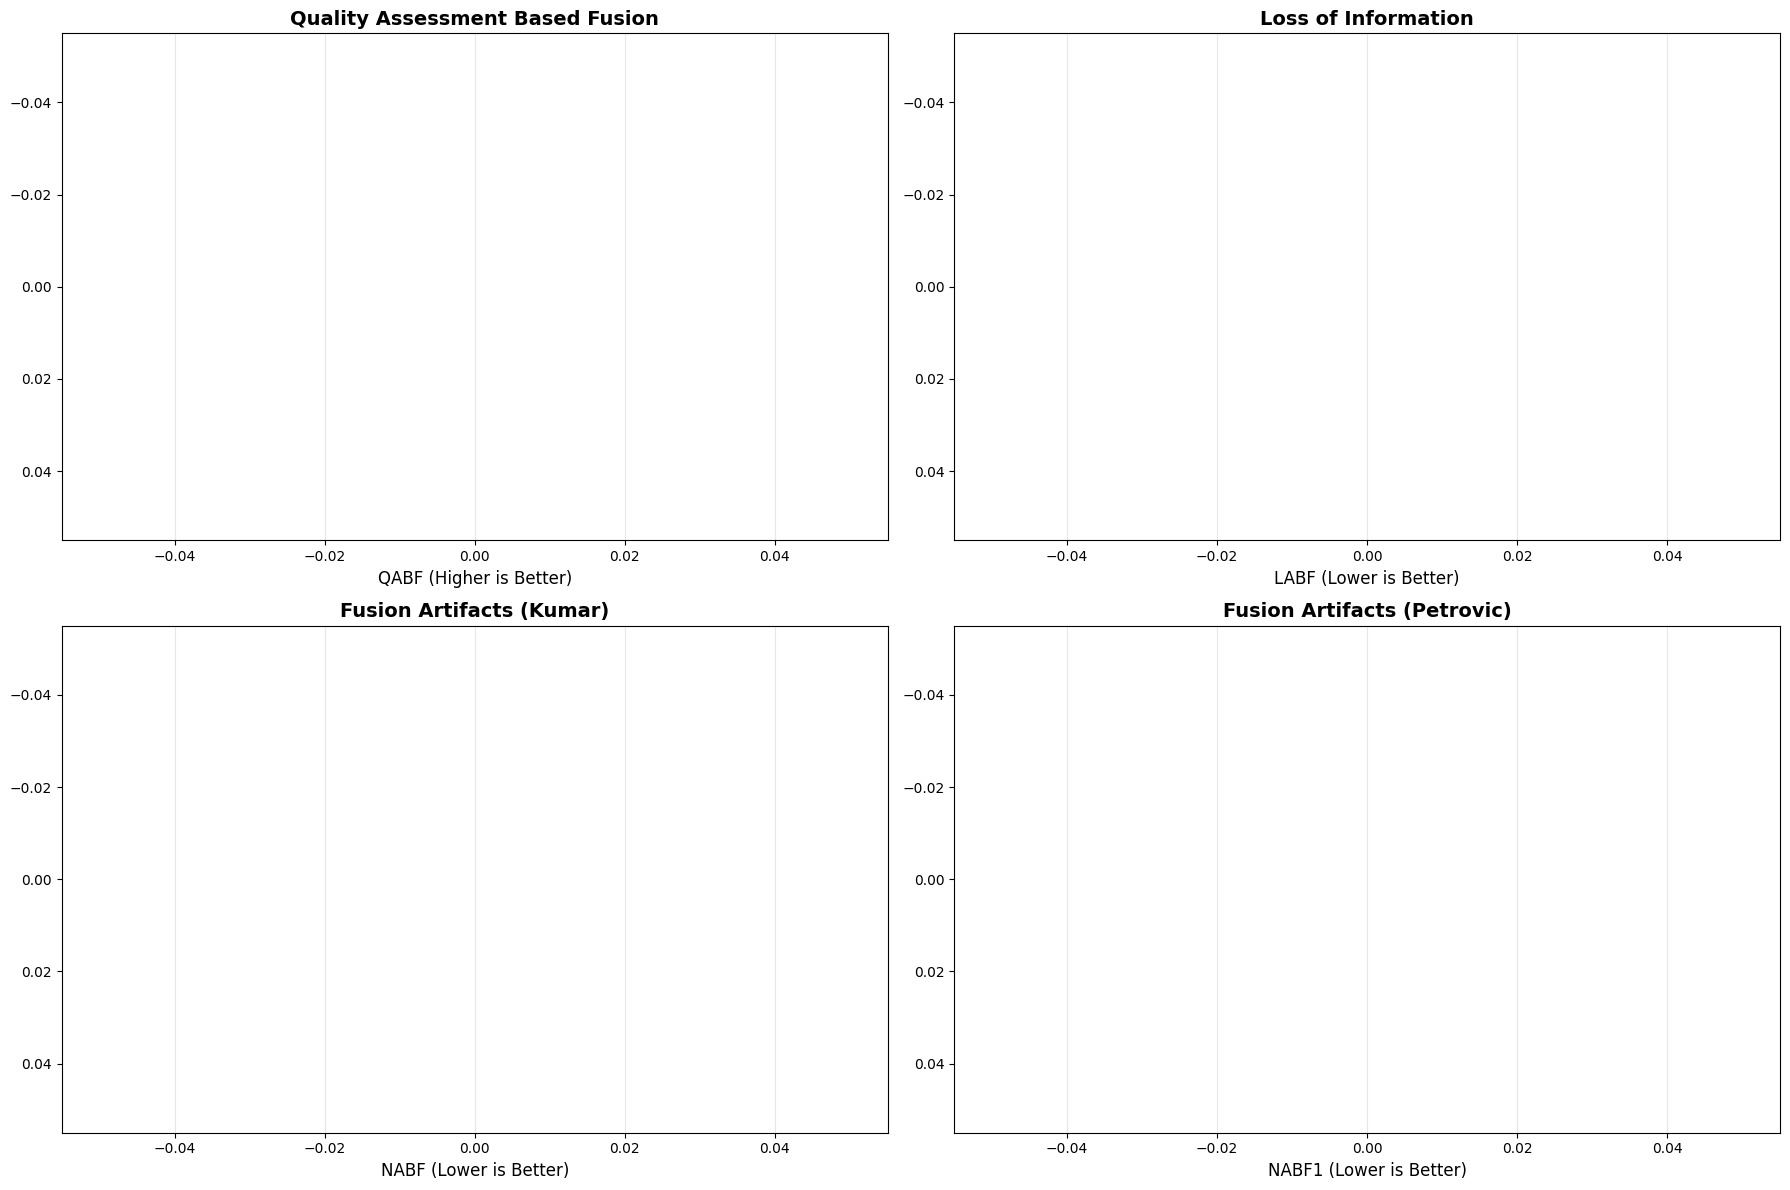

📊 Visualization saved as 'fusion_metrics_all_25_methods.png'


In [ ]:
# Visualize metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Sort by QABF for consistent ordering
df_plot = df_sorted.copy()

# QABF
axes[0, 0].barh(df_plot['method'], df_plot['QABF'], color='steelblue')
axes[0, 0].set_xlabel('QABF (Higher is Better)', fontsize=12)
axes[0, 0].set_title('Quality Assessment Based Fusion', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()

# LABF
axes[0, 1].barh(df_plot['method'], df_plot['LABF'], color='coral')
axes[0, 1].set_xlabel('LABF (Lower is Better)', fontsize=12)
axes[0, 1].set_title('Loss of Information', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# NABF
axes[1, 0].barh(df_plot['method'], df_plot['NABF'], color='mediumseagreen')
axes[1, 0].set_xlabel('NABF (Lower is Better)', fontsize=12)
axes[1, 0].set_title('Fusion Artifacts (Kumar)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# NABF1
axes[1, 1].barh(df_plot['method'], df_plot['NABF1'], color='mediumpurple')
axes[1, 1].set_xlabel('NABF1 (Lower is Better)', fontsize=12)
axes[1, 1].set_title('Fusion Artifacts (Petrovic)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('fusion_metrics_all_25_methods.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Visualization saved as 'fusion_metrics_all_25_methods.png'")

## Save Results to CSV

In [ ]:
# Save complete results to CSV
output_file = "fusion_metrics_all_25_methods.csv"

# Select columns to save
columns_to_save = ['method', 'status', 'QABF', 'LABF', 'NABF', 'NABF1', 
                   'QABF_std', 'LABF_std', 'NABF_std', 'NABF1_std', 'num_images']

# Create output dataframe
df_output = df_metrics[columns_to_save].copy()

# Sort by QABF (descending)
df_output = df_output.sort_values('QABF', ascending=False, na_position='last')

# Save to CSV
df_output.to_csv(output_file, index=False, float_format='%.6f')

print(f"✅ Results saved to: {output_file}")
print(f"\nColumns saved:")
for col in columns_to_save:
    print(f"  - {col}")

# Display first few rows
print(f"\nPreview of saved data:")
print(df_output.head(10).to_string(index=False))

KeyError: "['QABF_std', 'LABF_std', 'NABF_std', 'NABF1_std', 'num_images'] not in index"

## Top Performers Analysis

In [ ]:
# Identify top performers for each metric
print("=" * 80)
print("TOP PERFORMERS BY METRIC")
print("=" * 80)

successful = df_metrics[df_metrics['QABF'].notna()].copy()

if len(successful) > 0:
    # Best QABF (highest)
    print("\n🏆 Top 5 by QABF (Information Transfer):")
    top_qabf = successful.nlargest(5, 'QABF')
    for idx, row in top_qabf.iterrows():
        print(f"  {idx+1}. {row['method']:<35} QABF: {row['QABF']:.4f}")
    
    # Best LABF (lowest)
    print("\n🏆 Top 5 by LABF (Lowest Information Loss):")
    top_labf = successful.nsmallest(5, 'LABF')
    for idx, row in top_labf.iterrows():
        print(f"  {idx+1}. {row['method']:<35} LABF: {row['LABF']:.4f}")
    
    # Best NABF (lowest)
    print("\n🏆 Top 5 by NABF (Fewest Artifacts - Kumar):")
    top_nabf = successful.nsmallest(5, 'NABF')
    for idx, row in top_nabf.iterrows():
        print(f"  {idx+1}. {row['method']:<35} NABF: {row['NABF']:.4f}")
    
    # Best NABF1 (lowest)
    print("\n🏆 Top 5 by NABF1 (Fewest Artifacts - Petrovic):")
    top_nabf1 = successful.nsmallest(5, 'NABF1')
    for idx, row in top_nabf1.iterrows():
        print(f"  {idx+1}. {row['method']:<35} NABF1: {row['NABF1']:.4f}")
    
    # Overall best (high QABF, low LABF, low NABF)
    print("\n🌟 OVERALL BEST (Composite Score):")
    print("   Score = QABF - 0.5*LABF - 0.5*NABF")
    successful['composite_score'] = (
        successful['QABF'] - 
        0.5 * successful['LABF'] - 
        0.5 * successful['NABF']
    )
    top_composite = successful.nlargest(5, 'composite_score')
    for idx, row in top_composite.iterrows():
        print(f"  {idx+1}. {row['method']:<35} Score: {row['composite_score']:.4f}")
        print(f"      QABF: {row['QABF']:.4f}, LABF: {row['LABF']:.4f}, NABF: {row['NABF']:.4f}")

print("\n" + "=" * 80)

TOP PERFORMERS BY METRIC

